C:\Users\Dom\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
import numpy as np
import pandas as pd
import time
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline


readdata = pd.read_csv("/home/dom/Documents/MPhys/TheGrandTour/wine_data.txt", sep="\t", header=None);
data = np.array(readdata);
data = np.delete(data, 0, 0)
data = data.astype(float)
data = np.swapaxes(data,0,1)


# Need to seperate the classification dimension:
classification = data[13]
data = np.delete(data, 13, axis=0)


# make list of colours for each number:
data_colour = []
for i in range(len(classification)):
    if classification[i] == 1:
        data_colour.append("r")
    elif classification[i] == 2:
        data_colour.append("b")
    elif classification[i] == 3:
        data_colour.append("g")
        
# Normalizes the data        
for i in range(0, np.shape(data)[0]):
    data[i,:] = (data[i,:] / np.ndarray.max(data[i,:])) * 2 - 1
    
        


#VARIABLES
stepSize = 0.01
nSteps = 10000

def getAlpha(d):
    """
    NEEDS IMPLEMENTATION
    Should produce 1xd(d-1)/2 array of position in grand tour.
    """
    p = d*(d-1)/2     
    primeList = []
    count = 1
    while len(primeList) < p:
        count += 1
        primeBool = False
        for i in range(2, count - 1):
            if count % i == 0:
                primeBool = True
        if primeBool == False:
            irrational = (np.sqrt(count)%1)
            primeList.append(irrational)
            
    primeList = np.asarray(primeList)
    primeList = primeList.dot(stepSize)
    """
    Irrational number generation using exponentials, not being used
    p = int(d*(d-1)/2)
    alpha = np.zeros(p) #alpha(t) parameters defining grand tour in G2,d
    for i in range(0,p):
        alpha[i] = (np.exp(i) % 1) * 2 * np.pi
        
    alpha = alpha.dot(0.001)
    """
    
    
    return primeList


def getAngles(alpha,d):
    """""
    Inputs: 
    alpha = 1xd(d-1)/2 array defining position on grand tour
    d = dimensions of data
    Outputs a dxd array of angles required for the transformation
    """
    theta = np.zeros((d,d));
    i = 0;
    k = 0;
    
    while i < d-1:
        j = i + 1;
        
        while j < d:
            theta[i][j] = alpha[k];
            j += 1;
            k += 1;
    
        i+= 1;
        
    return theta;


def RotationMatrix(i, j, d, theta):
    """
    Inputs:
    i = first indicie of rotating plane
    j = second indicie of rotating plane
    d = dimensions of data
    theta = dxd array of angle of rotation of rotating plane
    Outputs a rotating matrix to rotate plane of ixj plane by theta_ij
    """
    R = np.identity(d)
    R[i,i] = np.cos(theta)
    R[i,j] = -1*np.sin(theta)
    R[j,i] = np.sin(theta)
    R[j,j] = np.cos(theta)
    return R


def BetaFn(d, theta):
    """
    Inputs:
    d = dimensions of data
    theta = dxd array of angle of rotation ixj plane
    Outputs the full matrix transformation for all rotations
    """
    b = RotationMatrix(1, 2, d, theta[1,2])
    i = 1
    j = 2
    for i in range(d):
        for j in range(d):
            if j <= i:
                continue
            if i==1 and j==2:
                continue
            b = np.matmul(b, RotationMatrix(i, j, d, theta[i,j]))
            
    return b


def GrandTour(data, nSteps):
    """
    Inputs:
    data = array of data points, dimensions x npoints
    Outputs a 3D array number of points x t x dimensions, where t
    the time step at that point in the tour
    """

    d = np.shape(data)[0] #dimensions of data
    nPoints = np.shape(data)[1] #number of data points
    tData = np.zeros((nSteps,d,nPoints)) #initialise 3d matrix to store stransforemd data at each timestep
    tBeta = np.zeros((nSteps,d,d))
    Alpha = getAlpha(d)

    
    for t in range(0, nSteps):
        
        
        alpha = Alpha.dot(t)
        theta = getAngles(alpha, d)
        b = BetaFn(d, theta)
        a = np.matmul(b, data)
        tData[t,:,:] = a
        tBeta[t,:,:] = b
        
    return tData, tBeta


tData, tBeta = GrandTour(data, nSteps)


In [2]:
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
targetData = np.zeros((len(tData[0][0]), 3))
for counter, i in enumerate(classification):
    targetData[counter][int(i-1)] = 1
targetData

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [5]:
import time

accuracy = []

start = time.clock()

init_op = tf.global_variables_initializer()


    
iterations = 1000
for i in range(iterations):

    if i % 10 == 0 and i != 0:
        current_time = time.clock() - start
        time_left = (float(current_time) / i) * (iterations - i)
        print("Time elapsed: " + str(current_time))
        print("Timestep: " + str(i) + " out of " + str(iterations))
        print("Approximately " + str(int(time_left)) + " seconds left")
        
    tf.reset_default_graph()

    xData = tData[i][0]
    yData = tData[i][1]
    trainingData = np.vstack((xData, yData)).T
    # NN model code
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
    #model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    nnet = model.fit(trainingData, targetData, epochs=60)
    accuracy.append(np.mean(nnet.history["acc"]))
    
print(accuracy)

Epoch 1/60
178/178 [==============================] - 0s 437us/step - loss: 5.6270 - acc: 0.1292
Epoch 2/60
178/178 [==============================] - 0s 27us/step - loss: 5.3451 - acc: 0.1236
Epoch 3/60
178/178 [==============================] - 0s 42us/step - loss: 4.9755 - acc: 0.1292
Epoch 4/60
178/178 [==============================] - 0s 36us/step - loss: 4.5957 - acc: 0.1404
Epoch 5/60
178/178 [==============================] - 0s 45us/step - loss: 4.2579 - acc: 0.1348
Epoch 6/60
178/178 [==============================] - 0s 37us/step - loss: 3.9413 - acc: 0.1124
Epoch 7/60
178/178 [==============================] - 0s 30us/step - loss: 3.6765 - acc: 0.0899
Epoch 8/60
178/178 [==============================] - 0s 43us/step - loss: 3.4565 - acc: 0.0674
Epoch 9/60
178/178 [==============================] - 0s 29us/step - loss: 3.2760 - acc: 0.0618
Epoch 10/60
178/178 [==============================] - 0s 40us/step - loss: 3.1358 - acc: 0.0618
Epoch 11/60
178/178 [=================

178/178 [==============================] - 0s 39us/step - loss: 1.2140 - acc: 0.1742
Epoch 26/60
178/178 [==============================] - 0s 53us/step - loss: 1.2095 - acc: 0.1685
Epoch 27/60
178/178 [==============================] - 0s 35us/step - loss: 1.2046 - acc: 0.1742
Epoch 28/60
178/178 [==============================] - 0s 38us/step - loss: 1.1996 - acc: 0.1685
Epoch 29/60
178/178 [==============================] - 0s 40us/step - loss: 1.1945 - acc: 0.1854
Epoch 30/60
178/178 [==============================] - 0s 47us/step - loss: 1.1896 - acc: 0.1966
Epoch 31/60
178/178 [==============================] - 0s 36us/step - loss: 1.1842 - acc: 0.2022
Epoch 32/60
178/178 [==============================] - 0s 37us/step - loss: 1.1782 - acc: 0.1966
Epoch 33/60
178/178 [==============================] - 0s 36us/step - loss: 1.1725 - acc: 0.1966
Epoch 34/60
178/178 [==============================] - 0s 40us/step - loss: 1.1666 - acc: 0.2191
Epoch 35/60
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.9593 - acc: 0.5730
Epoch 50/60
178/178 [==============================] - 0s 41us/step - loss: 0.9577 - acc: 0.5730
Epoch 51/60
178/178 [==============================] - 0s 37us/step - loss: 0.9562 - acc: 0.5787
Epoch 52/60
178/178 [==============================] - 0s 35us/step - loss: 0.9546 - acc: 0.5787
Epoch 53/60
178/178 [==============================] - 0s 46us/step - loss: 0.9532 - acc: 0.5787
Epoch 54/60
178/178 [==============================] - 0s 46us/step - loss: 0.9516 - acc: 0.5787
Epoch 55/60
178/178 [==============================] - 0s 52us/step - loss: 0.9500 - acc: 0.5899
Epoch 56/60
178/178 [==============================] - 0s 35us/step - loss: 0.9487 - acc: 0.5955
Epoch 57/60
178/178 [==============================] - 0s 43us/step - loss: 0.9473 - acc: 0.5955
Epoch 58/60
178/178 [==============================] - 0s 42us/step - loss: 0.9457 - acc: 0.5899
Epoch 59/60
178/178 [=====================

178/178 [==============================] - 0s 40us/step - loss: 0.8659 - acc: 0.6573
Epoch 14/60
178/178 [==============================] - 0s 35us/step - loss: 0.8651 - acc: 0.6573
Epoch 15/60
178/178 [==============================] - 0s 46us/step - loss: 0.8643 - acc: 0.6573
Epoch 16/60
178/178 [==============================] - 0s 41us/step - loss: 0.8637 - acc: 0.6573
Epoch 17/60
178/178 [==============================] - 0s 45us/step - loss: 0.8628 - acc: 0.6517
Epoch 18/60
178/178 [==============================] - 0s 40us/step - loss: 0.8621 - acc: 0.6573
Epoch 19/60
178/178 [==============================] - 0s 39us/step - loss: 0.8615 - acc: 0.6517
Epoch 20/60
178/178 [==============================] - 0s 37us/step - loss: 0.8606 - acc: 0.6573
Epoch 21/60
178/178 [==============================] - 0s 50us/step - loss: 0.8599 - acc: 0.6573
Epoch 22/60
178/178 [==============================] - 0s 40us/step - loss: 0.8591 - acc: 0.6629
Epoch 23/60
178/178 [=====================

178/178 [==============================] - 0s 56us/step - loss: 0.8145 - acc: 0.6685
Epoch 38/60
178/178 [==============================] - 0s 34us/step - loss: 0.8140 - acc: 0.6685
Epoch 39/60
178/178 [==============================] - 0s 45us/step - loss: 0.8136 - acc: 0.6685
Epoch 40/60
178/178 [==============================] - 0s 39us/step - loss: 0.8130 - acc: 0.6685
Epoch 41/60
178/178 [==============================] - 0s 36us/step - loss: 0.8125 - acc: 0.6685
Epoch 42/60
178/178 [==============================] - 0s 56us/step - loss: 0.8121 - acc: 0.6685
Epoch 43/60
178/178 [==============================] - 0s 36us/step - loss: 0.8116 - acc: 0.6685
Epoch 44/60
178/178 [==============================] - 0s 49us/step - loss: 0.8111 - acc: 0.6685
Epoch 45/60
178/178 [==============================] - 0s 31us/step - loss: 0.8106 - acc: 0.6685
Epoch 46/60
178/178 [==============================] - 0s 41us/step - loss: 0.8102 - acc: 0.6685
Epoch 47/60
178/178 [=====================

178/178 [==============================] - 0s 473us/step - loss: 0.7868 - acc: 0.6798
Epoch 2/60
178/178 [==============================] - 0s 29us/step - loss: 0.7865 - acc: 0.6742
Epoch 3/60
178/178 [==============================] - 0s 31us/step - loss: 0.7861 - acc: 0.6685
Epoch 4/60
178/178 [==============================] - 0s 42us/step - loss: 0.7855 - acc: 0.6685
Epoch 5/60
178/178 [==============================] - 0s 39us/step - loss: 0.7855 - acc: 0.6685
Epoch 6/60
178/178 [==============================] - 0s 39us/step - loss: 0.7848 - acc: 0.6685
Epoch 7/60
178/178 [==============================] - 0s 40us/step - loss: 0.7846 - acc: 0.6685
Epoch 8/60
178/178 [==============================] - 0s 32us/step - loss: 0.7841 - acc: 0.6685
Epoch 9/60
178/178 [==============================] - 0s 40us/step - loss: 0.7838 - acc: 0.6685
Epoch 10/60
178/178 [==============================] - 0s 49us/step - loss: 0.7836 - acc: 0.6742
Epoch 11/60
178/178 [============================

178/178 [==============================] - 0s 44us/step - loss: 0.7440 - acc: 0.7079
Epoch 26/60
178/178 [==============================] - 0s 29us/step - loss: 0.7432 - acc: 0.7135
Epoch 27/60
178/178 [==============================] - 0s 47us/step - loss: 0.7426 - acc: 0.7079
Epoch 28/60
178/178 [==============================] - 0s 49us/step - loss: 0.7422 - acc: 0.7079
Epoch 29/60
178/178 [==============================] - 0s 46us/step - loss: 0.7418 - acc: 0.7079
Epoch 30/60
178/178 [==============================] - 0s 41us/step - loss: 0.7414 - acc: 0.7079
Epoch 31/60
178/178 [==============================] - 0s 35us/step - loss: 0.7410 - acc: 0.7079
Epoch 32/60
178/178 [==============================] - 0s 40us/step - loss: 0.7409 - acc: 0.7022
Epoch 33/60
178/178 [==============================] - 0s 41us/step - loss: 0.7403 - acc: 0.7022
Epoch 34/60
178/178 [==============================] - 0s 40us/step - loss: 0.7398 - acc: 0.7022
Epoch 35/60
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.7211 - acc: 0.7360
Epoch 50/60
178/178 [==============================] - 0s 46us/step - loss: 0.7213 - acc: 0.7360
Epoch 51/60
178/178 [==============================] - 0s 42us/step - loss: 0.7203 - acc: 0.7360
Epoch 52/60
178/178 [==============================] - 0s 46us/step - loss: 0.7197 - acc: 0.7360
Epoch 53/60
178/178 [==============================] - 0s 37us/step - loss: 0.7199 - acc: 0.7247
Epoch 54/60
178/178 [==============================] - 0s 29us/step - loss: 0.7190 - acc: 0.7247
Epoch 55/60
178/178 [==============================] - 0s 43us/step - loss: 0.7187 - acc: 0.7247
Epoch 56/60
178/178 [==============================] - 0s 31us/step - loss: 0.7182 - acc: 0.7247
Epoch 57/60
178/178 [==============================] - 0s 33us/step - loss: 0.7175 - acc: 0.7303
Epoch 58/60
178/178 [==============================] - 0s 37us/step - loss: 0.7180 - acc: 0.7360
Epoch 59/60
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.7013 - acc: 0.7303
Epoch 13/60
178/178 [==============================] - 0s 31us/step - loss: 0.7008 - acc: 0.7303
Epoch 14/60
178/178 [==============================] - 0s 34us/step - loss: 0.7005 - acc: 0.7303
Epoch 15/60
178/178 [==============================] - 0s 34us/step - loss: 0.7003 - acc: 0.7303
Epoch 16/60
178/178 [==============================] - 0s 33us/step - loss: 0.7001 - acc: 0.7360
Epoch 17/60
178/178 [==============================] - 0s 46us/step - loss: 0.6992 - acc: 0.7303
Epoch 18/60
178/178 [==============================] - 0s 41us/step - loss: 0.6991 - acc: 0.7360
Epoch 19/60
178/178 [==============================] - 0s 34us/step - loss: 0.6985 - acc: 0.7360
Epoch 20/60
178/178 [==============================] - 0s 46us/step - loss: 0.6981 - acc: 0.7303
Epoch 21/60
178/178 [==============================] - 0s 28us/step - loss: 0.6977 - acc: 0.7303
Epoch 22/60
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.6814 - acc: 0.7472
Epoch 37/60
178/178 [==============================] - 0s 31us/step - loss: 0.6808 - acc: 0.7472
Epoch 38/60
178/178 [==============================] - 0s 43us/step - loss: 0.6805 - acc: 0.7472
Epoch 39/60
178/178 [==============================] - 0s 36us/step - loss: 0.6803 - acc: 0.7472
Epoch 40/60
178/178 [==============================] - 0s 42us/step - loss: 0.6801 - acc: 0.7472
Epoch 41/60
178/178 [==============================] - 0s 55us/step - loss: 0.6798 - acc: 0.7472
Epoch 42/60
178/178 [==============================] - 0s 50us/step - loss: 0.6796 - acc: 0.7472
Epoch 43/60
178/178 [==============================] - 0s 37us/step - loss: 0.6795 - acc: 0.7472
Epoch 44/60
178/178 [==============================] - 0s 29us/step - loss: 0.6794 - acc: 0.7472
Epoch 45/60
178/178 [==============================] - 0s 38us/step - loss: 0.6790 - acc: 0.7472
Epoch 46/60
178/178 [=====================

178/178 [==============================] - 0s 54us/step - loss: 0.6755 - acc: 0.7528
Epoch 1/60
178/178 [==============================] - 0s 470us/step - loss: 0.6847 - acc: 0.7528
Epoch 2/60
178/178 [==============================] - 0s 56us/step - loss: 0.6844 - acc: 0.7528
Epoch 3/60
178/178 [==============================] - 0s 34us/step - loss: 0.6840 - acc: 0.7528
Epoch 4/60
178/178 [==============================] - 0s 38us/step - loss: 0.6838 - acc: 0.7528
Epoch 5/60
178/178 [==============================] - 0s 34us/step - loss: 0.6833 - acc: 0.7584
Epoch 6/60
178/178 [==============================] - 0s 30us/step - loss: 0.6831 - acc: 0.7584
Epoch 7/60
178/178 [==============================] - 0s 39us/step - loss: 0.6829 - acc: 0.7584
Epoch 8/60
178/178 [==============================] - 0s 35us/step - loss: 0.6828 - acc: 0.7584
Epoch 9/60
178/178 [==============================] - 0s 36us/step - loss: 0.6831 - acc: 0.7528
Epoch 10/60
178/178 [=============================

178/178 [==============================] - 0s 27us/step - loss: 0.6831 - acc: 0.7697
Epoch 25/60
178/178 [==============================] - 0s 38us/step - loss: 0.6828 - acc: 0.7697
Epoch 26/60
178/178 [==============================] - 0s 30us/step - loss: 0.6827 - acc: 0.7697
Epoch 27/60
178/178 [==============================] - 0s 29us/step - loss: 0.6827 - acc: 0.7697
Epoch 28/60
178/178 [==============================] - 0s 38us/step - loss: 0.6826 - acc: 0.7697
Epoch 29/60
178/178 [==============================] - 0s 34us/step - loss: 0.6824 - acc: 0.7697
Epoch 30/60
178/178 [==============================] - 0s 37us/step - loss: 0.6823 - acc: 0.7640
Epoch 31/60
178/178 [==============================] - 0s 36us/step - loss: 0.6823 - acc: 0.7697
Epoch 32/60
178/178 [==============================] - 0s 36us/step - loss: 0.6822 - acc: 0.7640
Epoch 33/60
178/178 [==============================] - 0s 45us/step - loss: 0.6821 - acc: 0.7697
Epoch 34/60
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.6842 - acc: 0.7640
Epoch 49/60
178/178 [==============================] - 0s 35us/step - loss: 0.6843 - acc: 0.7640
Epoch 50/60
178/178 [==============================] - 0s 36us/step - loss: 0.6843 - acc: 0.7640
Epoch 51/60
178/178 [==============================] - 0s 30us/step - loss: 0.6839 - acc: 0.7640
Epoch 52/60
178/178 [==============================] - 0s 47us/step - loss: 0.6840 - acc: 0.7640
Epoch 53/60
178/178 [==============================] - 0s 49us/step - loss: 0.6836 - acc: 0.7640
Epoch 54/60
178/178 [==============================] - 0s 39us/step - loss: 0.6837 - acc: 0.7640
Epoch 55/60
178/178 [==============================] - 0s 35us/step - loss: 0.6837 - acc: 0.7640
Epoch 56/60
178/178 [==============================] - 0s 27us/step - loss: 0.6835 - acc: 0.7640
Epoch 57/60
178/178 [==============================] - 0s 42us/step - loss: 0.6834 - acc: 0.7640
Epoch 58/60
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.6946 - acc: 0.7697
Epoch 13/60
178/178 [==============================] - 0s 32us/step - loss: 0.6945 - acc: 0.7697
Epoch 14/60
178/178 [==============================] - 0s 57us/step - loss: 0.6946 - acc: 0.7697
Epoch 15/60
178/178 [==============================] - 0s 34us/step - loss: 0.6942 - acc: 0.7697
Epoch 16/60
178/178 [==============================] - 0s 37us/step - loss: 0.6943 - acc: 0.7697
Epoch 17/60
178/178 [==============================] - 0s 32us/step - loss: 0.6944 - acc: 0.7697
Epoch 18/60
178/178 [==============================] - 0s 30us/step - loss: 0.6943 - acc: 0.7640
Epoch 19/60
178/178 [==============================] - 0s 56us/step - loss: 0.6943 - acc: 0.7697
Epoch 20/60
178/178 [==============================] - 0s 26us/step - loss: 0.6940 - acc: 0.7697
Epoch 21/60
178/178 [==============================] - 0s 35us/step - loss: 0.6939 - acc: 0.7640
Epoch 22/60
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.7006 - acc: 0.7472
Epoch 37/60
178/178 [==============================] - 0s 35us/step - loss: 0.7003 - acc: 0.7472
Epoch 38/60
178/178 [==============================] - 0s 41us/step - loss: 0.6999 - acc: 0.7472
Epoch 39/60
178/178 [==============================] - 0s 35us/step - loss: 0.6999 - acc: 0.7472
Epoch 40/60
178/178 [==============================] - 0s 43us/step - loss: 0.6994 - acc: 0.7472
Epoch 41/60
178/178 [==============================] - 0s 33us/step - loss: 0.6996 - acc: 0.7472
Epoch 42/60
178/178 [==============================] - 0s 34us/step - loss: 0.6995 - acc: 0.7472
Epoch 43/60
178/178 [==============================] - 0s 43us/step - loss: 0.6993 - acc: 0.7472
Epoch 44/60
178/178 [==============================] - 0s 28us/step - loss: 0.6995 - acc: 0.7584
Epoch 45/60
178/178 [==============================] - 0s 39us/step - loss: 0.6991 - acc: 0.7472
Epoch 46/60
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.7018 - acc: 0.7360
Epoch 60/60
178/178 [==============================] - 0s 30us/step - loss: 0.7021 - acc: 0.7416
Epoch 1/60
178/178 [==============================] - 0s 461us/step - loss: 0.7140 - acc: 0.7472
Epoch 2/60
178/178 [==============================] - 0s 45us/step - loss: 0.7137 - acc: 0.7472
Epoch 3/60
178/178 [==============================] - 0s 34us/step - loss: 0.7129 - acc: 0.7416
Epoch 4/60
178/178 [==============================] - 0s 28us/step - loss: 0.7125 - acc: 0.7416
Epoch 5/60
178/178 [==============================] - 0s 39us/step - loss: 0.7120 - acc: 0.7360
Epoch 6/60
178/178 [==============================] - 0s 31us/step - loss: 0.7116 - acc: 0.7360
Epoch 7/60
178/178 [==============================] - 0s 28us/step - loss: 0.7113 - acc: 0.7360
Epoch 8/60
178/178 [==============================] - 0s 40us/step - loss: 0.7112 - acc: 0.7360
Epoch 9/60
178/178 [=============================

178/178 [==============================] - 0s 37us/step - loss: 0.7161 - acc: 0.7191
Epoch 24/60
178/178 [==============================] - 0s 34us/step - loss: 0.7160 - acc: 0.7191
Epoch 25/60
178/178 [==============================] - 0s 36us/step - loss: 0.7159 - acc: 0.7191
Epoch 26/60
178/178 [==============================] - 0s 45us/step - loss: 0.7159 - acc: 0.7191
Epoch 27/60
178/178 [==============================] - 0s 37us/step - loss: 0.7156 - acc: 0.7191
Epoch 28/60
178/178 [==============================] - 0s 43us/step - loss: 0.7156 - acc: 0.7191
Epoch 29/60
178/178 [==============================] - 0s 30us/step - loss: 0.7155 - acc: 0.7191
Epoch 30/60
178/178 [==============================] - 0s 39us/step - loss: 0.7158 - acc: 0.7191
Epoch 31/60
178/178 [==============================] - 0s 28us/step - loss: 0.7159 - acc: 0.7191
Epoch 32/60
178/178 [==============================] - 0s 34us/step - loss: 0.7156 - acc: 0.7191
Epoch 33/60
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.7218 - acc: 0.7135
Epoch 48/60
178/178 [==============================] - 0s 36us/step - loss: 0.7221 - acc: 0.7135
Epoch 49/60
178/178 [==============================] - 0s 37us/step - loss: 0.7217 - acc: 0.7135
Epoch 50/60
178/178 [==============================] - 0s 29us/step - loss: 0.7219 - acc: 0.7135
Epoch 51/60
178/178 [==============================] - 0s 40us/step - loss: 0.7217 - acc: 0.7135
Epoch 52/60
178/178 [==============================] - 0s 38us/step - loss: 0.7216 - acc: 0.7135
Epoch 53/60
178/178 [==============================] - 0s 28us/step - loss: 0.7216 - acc: 0.7135
Epoch 54/60
178/178 [==============================] - 0s 38us/step - loss: 0.7215 - acc: 0.7135
Epoch 55/60
178/178 [==============================] - 0s 34us/step - loss: 0.7214 - acc: 0.7191
Epoch 56/60
178/178 [==============================] - 0s 27us/step - loss: 0.7215 - acc: 0.7191
Epoch 57/60
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.7402 - acc: 0.7022
Epoch 12/60
178/178 [==============================] - 0s 40us/step - loss: 0.7398 - acc: 0.6966
Epoch 13/60
178/178 [==============================] - 0s 30us/step - loss: 0.7398 - acc: 0.6966
Epoch 14/60
178/178 [==============================] - 0s 45us/step - loss: 0.7396 - acc: 0.6966
Epoch 15/60
178/178 [==============================] - 0s 39us/step - loss: 0.7399 - acc: 0.6966
Epoch 16/60
178/178 [==============================] - 0s 27us/step - loss: 0.7396 - acc: 0.7022
Epoch 17/60
178/178 [==============================] - 0s 36us/step - loss: 0.7394 - acc: 0.7022
Epoch 18/60
178/178 [==============================] - 0s 32us/step - loss: 0.7391 - acc: 0.7022
Epoch 19/60
178/178 [==============================] - 0s 27us/step - loss: 0.7389 - acc: 0.6966
Epoch 20/60
178/178 [==============================] - 0s 35us/step - loss: 0.7388 - acc: 0.6966
Epoch 21/60
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.7430 - acc: 0.6966
Epoch 36/60
178/178 [==============================] - 0s 37us/step - loss: 0.7429 - acc: 0.6966
Epoch 37/60
178/178 [==============================] - 0s 32us/step - loss: 0.7432 - acc: 0.6966
Epoch 38/60
178/178 [==============================] - 0s 37us/step - loss: 0.7428 - acc: 0.6966
Epoch 39/60
178/178 [==============================] - 0s 46us/step - loss: 0.7429 - acc: 0.6966
Epoch 40/60
178/178 [==============================] - 0s 40us/step - loss: 0.7425 - acc: 0.6966
Epoch 41/60
178/178 [==============================] - 0s 42us/step - loss: 0.7428 - acc: 0.6966
Epoch 42/60
178/178 [==============================] - 0s 26us/step - loss: 0.7423 - acc: 0.6966
Epoch 43/60
178/178 [==============================] - 0s 37us/step - loss: 0.7423 - acc: 0.6966
Epoch 44/60
178/178 [==============================] - 0s 37us/step - loss: 0.7418 - acc: 0.6966
Epoch 45/60
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.7456 - acc: 0.7022
Epoch 60/60
178/178 [==============================] - 0s 44us/step - loss: 0.7456 - acc: 0.7022
Epoch 1/60
178/178 [==============================] - 0s 452us/step - loss: 0.7587 - acc: 0.6910
Epoch 2/60
178/178 [==============================] - 0s 43us/step - loss: 0.7578 - acc: 0.6910
Epoch 3/60
178/178 [==============================] - 0s 39us/step - loss: 0.7573 - acc: 0.6910
Epoch 4/60
178/178 [==============================] - 0s 27us/step - loss: 0.7571 - acc: 0.6910
Epoch 5/60
178/178 [==============================] - 0s 39us/step - loss: 0.7569 - acc: 0.6910
Epoch 6/60
178/178 [==============================] - 0s 34us/step - loss: 0.7571 - acc: 0.6966
Epoch 7/60
178/178 [==============================] - 0s 37us/step - loss: 0.7567 - acc: 0.6966
Epoch 8/60
178/178 [==============================] - 0s 34us/step - loss: 0.7565 - acc: 0.6910
Epoch 9/60
178/178 [=============================

178/178 [==============================] - 0s 44us/step - loss: 0.7596 - acc: 0.6742
Epoch 24/60
178/178 [==============================] - 0s 31us/step - loss: 0.7593 - acc: 0.6742
Epoch 25/60
178/178 [==============================] - 0s 41us/step - loss: 0.7590 - acc: 0.6798
Epoch 26/60
178/178 [==============================] - 0s 38us/step - loss: 0.7588 - acc: 0.6798
Epoch 27/60
178/178 [==============================] - 0s 35us/step - loss: 0.7593 - acc: 0.6798
Epoch 28/60
178/178 [==============================] - 0s 39us/step - loss: 0.7589 - acc: 0.6798
Epoch 29/60
178/178 [==============================] - 0s 33us/step - loss: 0.7591 - acc: 0.6798
Epoch 30/60
178/178 [==============================] - 0s 30us/step - loss: 0.7586 - acc: 0.6798
Epoch 31/60
178/178 [==============================] - 0s 37us/step - loss: 0.7584 - acc: 0.6798
Epoch 32/60
178/178 [==============================] - 0s 29us/step - loss: 0.7583 - acc: 0.6798
Epoch 33/60
178/178 [=====================

178/178 [==============================] - 0s 31us/step - loss: 0.7600 - acc: 0.6742
Epoch 47/60
178/178 [==============================] - 0s 44us/step - loss: 0.7599 - acc: 0.6742
Epoch 48/60
178/178 [==============================] - 0s 37us/step - loss: 0.7599 - acc: 0.6798
Epoch 49/60
178/178 [==============================] - 0s 31us/step - loss: 0.7597 - acc: 0.6798
Epoch 50/60
178/178 [==============================] - 0s 37us/step - loss: 0.7596 - acc: 0.6798
Epoch 51/60
178/178 [==============================] - 0s 40us/step - loss: 0.7595 - acc: 0.6798
Epoch 52/60
178/178 [==============================] - 0s 29us/step - loss: 0.7593 - acc: 0.6798
Epoch 53/60
178/178 [==============================] - 0s 46us/step - loss: 0.7596 - acc: 0.6742
Epoch 54/60
178/178 [==============================] - 0s 31us/step - loss: 0.7591 - acc: 0.6742
Epoch 55/60
178/178 [==============================] - 0s 37us/step - loss: 0.7590 - acc: 0.6685
Epoch 56/60
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.7625 - acc: 0.6742
Epoch 11/60
178/178 [==============================] - 0s 37us/step - loss: 0.7623 - acc: 0.6742
Epoch 12/60
178/178 [==============================] - 0s 37us/step - loss: 0.7617 - acc: 0.6742
Epoch 13/60
178/178 [==============================] - 0s 32us/step - loss: 0.7611 - acc: 0.6742
Epoch 14/60
178/178 [==============================] - 0s 39us/step - loss: 0.7605 - acc: 0.6742
Epoch 15/60
178/178 [==============================] - 0s 36us/step - loss: 0.7604 - acc: 0.6685
Epoch 16/60
178/178 [==============================] - 0s 39us/step - loss: 0.7604 - acc: 0.6798
Epoch 17/60
178/178 [==============================] - 0s 44us/step - loss: 0.7595 - acc: 0.6798
Epoch 18/60
178/178 [==============================] - 0s 33us/step - loss: 0.7591 - acc: 0.6798
Epoch 19/60
178/178 [==============================] - 0s 46us/step - loss: 0.7582 - acc: 0.6798
Epoch 20/60
178/178 [=====================

178/178 [==============================] - 0s 28us/step - loss: 0.7465 - acc: 0.6910
Epoch 35/60
178/178 [==============================] - 0s 34us/step - loss: 0.7466 - acc: 0.6910
Epoch 36/60
178/178 [==============================] - 0s 37us/step - loss: 0.7464 - acc: 0.6854
Epoch 37/60
178/178 [==============================] - 0s 30us/step - loss: 0.7464 - acc: 0.6854
Epoch 38/60
178/178 [==============================] - 0s 37us/step - loss: 0.7464 - acc: 0.6854
Epoch 39/60
178/178 [==============================] - 0s 36us/step - loss: 0.7462 - acc: 0.6798
Epoch 40/60
178/178 [==============================] - 0s 30us/step - loss: 0.7461 - acc: 0.6854
Epoch 41/60
178/178 [==============================] - 0s 59us/step - loss: 0.7459 - acc: 0.6854
Epoch 42/60
178/178 [==============================] - 0s 29us/step - loss: 0.7466 - acc: 0.6854
Epoch 43/60
178/178 [==============================] - 0s 57us/step - loss: 0.7459 - acc: 0.6854
Epoch 44/60
178/178 [=====================

178/178 [==============================] - 0s 50us/step - loss: 0.7432 - acc: 0.6854
Epoch 59/60
178/178 [==============================] - 0s 33us/step - loss: 0.7430 - acc: 0.6854
Epoch 60/60
178/178 [==============================] - 0s 40us/step - loss: 0.7427 - acc: 0.6854
Epoch 1/60
178/178 [==============================] - 0s 490us/step - loss: 0.7501 - acc: 0.6629
Epoch 2/60
178/178 [==============================] - 0s 34us/step - loss: 0.7497 - acc: 0.6685
Epoch 3/60
178/178 [==============================] - 0s 40us/step - loss: 0.7494 - acc: 0.6685
Epoch 4/60
178/178 [==============================] - 0s 30us/step - loss: 0.7494 - acc: 0.6685
Epoch 5/60
178/178 [==============================] - 0s 34us/step - loss: 0.7487 - acc: 0.6685
Epoch 6/60
178/178 [==============================] - 0s 35us/step - loss: 0.7493 - acc: 0.6798
Epoch 7/60
178/178 [==============================] - 0s 28us/step - loss: 0.7492 - acc: 0.6742
Epoch 8/60
178/178 [============================

178/178 [==============================] - 0s 34us/step - loss: 0.7442 - acc: 0.6798
Epoch 23/60
178/178 [==============================] - 0s 33us/step - loss: 0.7443 - acc: 0.6798
Epoch 24/60
178/178 [==============================] - 0s 32us/step - loss: 0.7446 - acc: 0.6854
Epoch 25/60
178/178 [==============================] - 0s 34us/step - loss: 0.7441 - acc: 0.6798
Epoch 26/60
178/178 [==============================] - 0s 31us/step - loss: 0.7435 - acc: 0.6798
Epoch 27/60
178/178 [==============================] - 0s 48us/step - loss: 0.7436 - acc: 0.6798
Epoch 28/60
178/178 [==============================] - 0s 40us/step - loss: 0.7433 - acc: 0.6798
Epoch 29/60
178/178 [==============================] - 0s 40us/step - loss: 0.7435 - acc: 0.6798
Epoch 30/60
178/178 [==============================] - 0s 31us/step - loss: 0.7432 - acc: 0.6798
Epoch 31/60
178/178 [==============================] - 0s 32us/step - loss: 0.7431 - acc: 0.6798
Epoch 32/60
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.7387 - acc: 0.6854
Epoch 47/60
178/178 [==============================] - 0s 33us/step - loss: 0.7383 - acc: 0.6854
Epoch 48/60
178/178 [==============================] - 0s 42us/step - loss: 0.7384 - acc: 0.6854
Epoch 49/60
178/178 [==============================] - 0s 27us/step - loss: 0.7392 - acc: 0.6854
Epoch 50/60
178/178 [==============================] - 0s 33us/step - loss: 0.7383 - acc: 0.6854
Epoch 51/60
178/178 [==============================] - 0s 40us/step - loss: 0.7388 - acc: 0.6854
Epoch 52/60
178/178 [==============================] - 0s 34us/step - loss: 0.7379 - acc: 0.6854
Epoch 53/60
178/178 [==============================] - 0s 35us/step - loss: 0.7378 - acc: 0.6910
Epoch 54/60
178/178 [==============================] - 0s 34us/step - loss: 0.7376 - acc: 0.6910
Epoch 55/60
178/178 [==============================] - 0s 26us/step - loss: 0.7378 - acc: 0.6910
Epoch 56/60
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.7354 - acc: 0.6854
Epoch 11/60
178/178 [==============================] - 0s 43us/step - loss: 0.7351 - acc: 0.6854
Epoch 12/60
178/178 [==============================] - 0s 33us/step - loss: 0.7350 - acc: 0.6854
Epoch 13/60
178/178 [==============================] - 0s 42us/step - loss: 0.7347 - acc: 0.6854
Epoch 14/60
178/178 [==============================] - 0s 32us/step - loss: 0.7346 - acc: 0.6854
Epoch 15/60
178/178 [==============================] - 0s 41us/step - loss: 0.7346 - acc: 0.6854
Epoch 16/60
178/178 [==============================] - 0s 32us/step - loss: 0.7345 - acc: 0.6854
Epoch 17/60
178/178 [==============================] - 0s 34us/step - loss: 0.7342 - acc: 0.6854
Epoch 18/60
178/178 [==============================] - 0s 41us/step - loss: 0.7341 - acc: 0.6854
Epoch 19/60
178/178 [==============================] - 0s 30us/step - loss: 0.7341 - acc: 0.6854
Epoch 20/60
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.7254 - acc: 0.6798
Epoch 34/60
178/178 [==============================] - 0s 35us/step - loss: 0.7251 - acc: 0.6854
Epoch 35/60
178/178 [==============================] - 0s 30us/step - loss: 0.7250 - acc: 0.6854
Epoch 36/60
178/178 [==============================] - 0s 47us/step - loss: 0.7248 - acc: 0.6798
Epoch 37/60
178/178 [==============================] - 0s 33us/step - loss: 0.7246 - acc: 0.6798
Epoch 38/60
178/178 [==============================] - 0s 27us/step - loss: 0.7245 - acc: 0.6854
Epoch 39/60
178/178 [==============================] - 0s 36us/step - loss: 0.7244 - acc: 0.6798
Epoch 40/60
178/178 [==============================] - 0s 31us/step - loss: 0.7245 - acc: 0.6798
Epoch 41/60
178/178 [==============================] - 0s 38us/step - loss: 0.7241 - acc: 0.6798
Epoch 42/60
178/178 [==============================] - 0s 35us/step - loss: 0.7240 - acc: 0.6798
Epoch 43/60
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.7173 - acc: 0.6685
Epoch 58/60
178/178 [==============================] - 0s 35us/step - loss: 0.7172 - acc: 0.6685
Epoch 59/60
178/178 [==============================] - 0s 35us/step - loss: 0.7171 - acc: 0.6685
Epoch 60/60
178/178 [==============================] - 0s 37us/step - loss: 0.7168 - acc: 0.6742
Epoch 1/60
178/178 [==============================] - 0s 435us/step - loss: 0.7180 - acc: 0.6854
Epoch 2/60
178/178 [==============================] - 0s 33us/step - loss: 0.7178 - acc: 0.6854
Epoch 3/60
178/178 [==============================] - 0s 29us/step - loss: 0.7170 - acc: 0.6854
Epoch 4/60
178/178 [==============================] - 0s 41us/step - loss: 0.7170 - acc: 0.6854
Epoch 5/60
178/178 [==============================] - 0s 31us/step - loss: 0.7166 - acc: 0.6854
Epoch 6/60
178/178 [==============================] - 0s 36us/step - loss: 0.7167 - acc: 0.6854
Epoch 7/60
178/178 [===========================

178/178 [==============================] - 0s 27us/step - loss: 0.7090 - acc: 0.6966
Epoch 22/60
178/178 [==============================] - 0s 33us/step - loss: 0.7085 - acc: 0.6966
Epoch 23/60
178/178 [==============================] - 0s 33us/step - loss: 0.7085 - acc: 0.6966
Epoch 24/60
178/178 [==============================] - 0s 34us/step - loss: 0.7086 - acc: 0.6966
Epoch 25/60
178/178 [==============================] - 0s 39us/step - loss: 0.7086 - acc: 0.6966
Epoch 26/60
178/178 [==============================] - 0s 33us/step - loss: 0.7084 - acc: 0.6966
Epoch 27/60
178/178 [==============================] - 0s 27us/step - loss: 0.7083 - acc: 0.6966
Epoch 28/60
178/178 [==============================] - 0s 46us/step - loss: 0.7082 - acc: 0.6966
Epoch 29/60
178/178 [==============================] - 0s 28us/step - loss: 0.7080 - acc: 0.6966
Epoch 30/60
178/178 [==============================] - 0s 42us/step - loss: 0.7081 - acc: 0.6966
Epoch 31/60
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.6999 - acc: 0.6966
Epoch 46/60
178/178 [==============================] - 0s 27us/step - loss: 0.6997 - acc: 0.6966
Epoch 47/60
178/178 [==============================] - 0s 35us/step - loss: 0.6998 - acc: 0.6966
Epoch 48/60
178/178 [==============================] - 0s 38us/step - loss: 0.6994 - acc: 0.6966
Epoch 49/60
178/178 [==============================] - 0s 39us/step - loss: 0.6996 - acc: 0.6966
Epoch 50/60
178/178 [==============================] - 0s 39us/step - loss: 0.6997 - acc: 0.6966
Epoch 51/60
178/178 [==============================] - 0s 35us/step - loss: 0.6996 - acc: 0.6966
Epoch 52/60
178/178 [==============================] - 0s 34us/step - loss: 0.6991 - acc: 0.6966
Epoch 53/60
178/178 [==============================] - 0s 40us/step - loss: 0.6990 - acc: 0.6966
Epoch 54/60
178/178 [==============================] - 0s 30us/step - loss: 0.6988 - acc: 0.6966
Epoch 55/60
178/178 [=====================

178/178 [==============================] - 0s 33us/step - loss: 0.6883 - acc: 0.7022
Epoch 10/60
178/178 [==============================] - 0s 38us/step - loss: 0.6883 - acc: 0.7022
Epoch 11/60
178/178 [==============================] - 0s 27us/step - loss: 0.6893 - acc: 0.7022
Epoch 12/60
178/178 [==============================] - 0s 34us/step - loss: 0.6887 - acc: 0.7022
Epoch 13/60
178/178 [==============================] - 0s 38us/step - loss: 0.6886 - acc: 0.7022
Epoch 14/60
178/178 [==============================] - 0s 37us/step - loss: 0.6884 - acc: 0.7022
Epoch 15/60
178/178 [==============================] - 0s 36us/step - loss: 0.6881 - acc: 0.7022
Epoch 16/60
178/178 [==============================] - 0s 33us/step - loss: 0.6879 - acc: 0.7022
Epoch 17/60
178/178 [==============================] - 0s 27us/step - loss: 0.6880 - acc: 0.7022
Epoch 18/60
178/178 [==============================] - 0s 50us/step - loss: 0.6883 - acc: 0.7022
Epoch 19/60
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.6816 - acc: 0.7079
Epoch 34/60
178/178 [==============================] - 0s 45us/step - loss: 0.6813 - acc: 0.7079
Epoch 35/60
178/178 [==============================] - 0s 33us/step - loss: 0.6815 - acc: 0.7079
Epoch 36/60
178/178 [==============================] - 0s 49us/step - loss: 0.6812 - acc: 0.7079
Epoch 37/60
178/178 [==============================] - 0s 46us/step - loss: 0.6814 - acc: 0.7079
Epoch 38/60
178/178 [==============================] - 0s 32us/step - loss: 0.6810 - acc: 0.7135
Epoch 39/60
178/178 [==============================] - 0s 38us/step - loss: 0.6811 - acc: 0.7135
Epoch 40/60
178/178 [==============================] - 0s 28us/step - loss: 0.6812 - acc: 0.7079
Epoch 41/60
178/178 [==============================] - 0s 36us/step - loss: 0.6811 - acc: 0.7135
Epoch 42/60
178/178 [==============================] - 0s 37us/step - loss: 0.6810 - acc: 0.7135
Epoch 43/60
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.6742 - acc: 0.7247
Epoch 58/60
178/178 [==============================] - 0s 28us/step - loss: 0.6742 - acc: 0.7247
Epoch 59/60
178/178 [==============================] - 0s 41us/step - loss: 0.6742 - acc: 0.7247
Epoch 60/60
178/178 [==============================] - 0s 31us/step - loss: 0.6743 - acc: 0.7191
Epoch 1/60
178/178 [==============================] - 0s 470us/step - loss: 0.6718 - acc: 0.7079
Epoch 2/60
178/178 [==============================] - 0s 38us/step - loss: 0.6717 - acc: 0.7079
Epoch 3/60
178/178 [==============================] - 0s 48us/step - loss: 0.6718 - acc: 0.7135
Epoch 4/60
178/178 [==============================] - 0s 28us/step - loss: 0.6719 - acc: 0.7191
Epoch 5/60
178/178 [==============================] - 0s 51us/step - loss: 0.6716 - acc: 0.7191
Epoch 6/60
178/178 [==============================] - 0s 27us/step - loss: 0.6711 - acc: 0.7191
Epoch 7/60
178/178 [===========================

178/178 [==============================] - 0s 34us/step - loss: 0.6646 - acc: 0.7135
Epoch 21/60
178/178 [==============================] - 0s 34us/step - loss: 0.6646 - acc: 0.7135
Epoch 22/60
178/178 [==============================] - 0s 38us/step - loss: 0.6641 - acc: 0.7135
Epoch 23/60
178/178 [==============================] - 0s 34us/step - loss: 0.6642 - acc: 0.7135
Epoch 24/60
178/178 [==============================] - 0s 34us/step - loss: 0.6642 - acc: 0.7135
Epoch 25/60
178/178 [==============================] - 0s 45us/step - loss: 0.6643 - acc: 0.7135
Epoch 26/60
178/178 [==============================] - 0s 33us/step - loss: 0.6642 - acc: 0.7135
Epoch 27/60
178/178 [==============================] - 0s 35us/step - loss: 0.6642 - acc: 0.7135
Epoch 28/60
178/178 [==============================] - 0s 34us/step - loss: 0.6642 - acc: 0.7191
Epoch 29/60
178/178 [==============================] - 0s 28us/step - loss: 0.6640 - acc: 0.7191
Epoch 30/60
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.6568 - acc: 0.7360
Epoch 45/60
178/178 [==============================] - 0s 28us/step - loss: 0.6572 - acc: 0.7303
Epoch 46/60
178/178 [==============================] - 0s 35us/step - loss: 0.6571 - acc: 0.7303
Epoch 47/60
178/178 [==============================] - 0s 32us/step - loss: 0.6569 - acc: 0.7303
Epoch 48/60
178/178 [==============================] - 0s 28us/step - loss: 0.6568 - acc: 0.7303
Epoch 49/60
178/178 [==============================] - 0s 47us/step - loss: 0.6565 - acc: 0.7303
Epoch 50/60
178/178 [==============================] - 0s 34us/step - loss: 0.6565 - acc: 0.7191
Epoch 51/60
178/178 [==============================] - 0s 27us/step - loss: 0.6565 - acc: 0.7191
Epoch 52/60
178/178 [==============================] - 0s 39us/step - loss: 0.6566 - acc: 0.7303
Epoch 53/60
178/178 [==============================] - 0s 30us/step - loss: 0.6564 - acc: 0.7303
Epoch 54/60
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.6461 - acc: 0.7303
Epoch 9/60
178/178 [==============================] - 0s 37us/step - loss: 0.6462 - acc: 0.7360
Epoch 10/60
178/178 [==============================] - 0s 35us/step - loss: 0.6460 - acc: 0.7303
Epoch 11/60
178/178 [==============================] - 0s 53us/step - loss: 0.6458 - acc: 0.7303
Epoch 12/60
178/178 [==============================] - 0s 29us/step - loss: 0.6457 - acc: 0.7303
Epoch 13/60
178/178 [==============================] - 0s 28us/step - loss: 0.6459 - acc: 0.7303
Epoch 14/60
178/178 [==============================] - 0s 38us/step - loss: 0.6456 - acc: 0.7303
Epoch 15/60
178/178 [==============================] - 0s 30us/step - loss: 0.6461 - acc: 0.7303
Epoch 16/60
178/178 [==============================] - 0s 37us/step - loss: 0.6457 - acc: 0.7303
Epoch 17/60
178/178 [==============================] - 0s 35us/step - loss: 0.6458 - acc: 0.7303
Epoch 18/60
178/178 [======================

178/178 [==============================] - 0s 35us/step - loss: 0.6389 - acc: 0.7360
Epoch 33/60
178/178 [==============================] - 0s 38us/step - loss: 0.6388 - acc: 0.7360
Epoch 34/60
178/178 [==============================] - 0s 28us/step - loss: 0.6390 - acc: 0.7360
Epoch 35/60
178/178 [==============================] - 0s 37us/step - loss: 0.6385 - acc: 0.7360
Epoch 36/60
178/178 [==============================] - 0s 35us/step - loss: 0.6385 - acc: 0.7360
Epoch 37/60
178/178 [==============================] - 0s 29us/step - loss: 0.6384 - acc: 0.7360
Epoch 38/60
178/178 [==============================] - 0s 38us/step - loss: 0.6388 - acc: 0.7360
Epoch 39/60
178/178 [==============================] - 0s 44us/step - loss: 0.6383 - acc: 0.7360
Epoch 40/60
178/178 [==============================] - 0s 39us/step - loss: 0.6383 - acc: 0.7360
Epoch 41/60
178/178 [==============================] - 0s 35us/step - loss: 0.6383 - acc: 0.7360
Epoch 42/60
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.6304 - acc: 0.7528
Epoch 57/60
178/178 [==============================] - 0s 39us/step - loss: 0.6303 - acc: 0.7528
Epoch 58/60
178/178 [==============================] - 0s 42us/step - loss: 0.6298 - acc: 0.7528
Epoch 59/60
178/178 [==============================] - 0s 42us/step - loss: 0.6296 - acc: 0.7528
Epoch 60/60
178/178 [==============================] - 0s 32us/step - loss: 0.6294 - acc: 0.7472
Epoch 1/60
178/178 [==============================] - 0s 437us/step - loss: 0.6255 - acc: 0.7584
Epoch 2/60
178/178 [==============================] - 0s 37us/step - loss: 0.6250 - acc: 0.7584
Epoch 3/60
178/178 [==============================] - 0s 36us/step - loss: 0.6248 - acc: 0.7584
Epoch 4/60
178/178 [==============================] - 0s 33us/step - loss: 0.6240 - acc: 0.7528
Epoch 5/60
178/178 [==============================] - 0s 29us/step - loss: 0.6238 - acc: 0.7528
Epoch 6/60
178/178 [==========================

178/178 [==============================] - 0s 28us/step - loss: 0.6133 - acc: 0.7584
Epoch 21/60
178/178 [==============================] - 0s 37us/step - loss: 0.6130 - acc: 0.7584
Epoch 22/60
178/178 [==============================] - 0s 35us/step - loss: 0.6130 - acc: 0.7584
Epoch 23/60
178/178 [==============================] - 0s 37us/step - loss: 0.6130 - acc: 0.7584
Epoch 24/60
178/178 [==============================] - 0s 39us/step - loss: 0.6128 - acc: 0.7584
Epoch 25/60
178/178 [==============================] - 0s 34us/step - loss: 0.6126 - acc: 0.7584
Epoch 26/60
178/178 [==============================] - 0s 29us/step - loss: 0.6126 - acc: 0.7584
Epoch 27/60
178/178 [==============================] - 0s 39us/step - loss: 0.6128 - acc: 0.7584
Epoch 28/60
178/178 [==============================] - 0s 28us/step - loss: 0.6128 - acc: 0.7584
Epoch 29/60
178/178 [==============================] - 0s 37us/step - loss: 0.6128 - acc: 0.7584
Epoch 30/60
178/178 [=====================

178/178 [==============================] - 0s 28us/step - loss: 0.6063 - acc: 0.7640
Epoch 45/60
178/178 [==============================] - 0s 34us/step - loss: 0.6062 - acc: 0.7640
Epoch 46/60
178/178 [==============================] - 0s 34us/step - loss: 0.6060 - acc: 0.7640
Epoch 47/60
178/178 [==============================] - 0s 33us/step - loss: 0.6059 - acc: 0.7640
Epoch 48/60
178/178 [==============================] - 0s 44us/step - loss: 0.6060 - acc: 0.7640
Epoch 49/60
178/178 [==============================] - 0s 36us/step - loss: 0.6058 - acc: 0.7640
Epoch 50/60
178/178 [==============================] - 0s 31us/step - loss: 0.6058 - acc: 0.7640
Epoch 51/60
178/178 [==============================] - 0s 38us/step - loss: 0.6056 - acc: 0.7640
Epoch 52/60
178/178 [==============================] - 0s 33us/step - loss: 0.6058 - acc: 0.7640
Epoch 53/60
178/178 [==============================] - 0s 36us/step - loss: 0.6058 - acc: 0.7640
Epoch 54/60
178/178 [=====================

178/178 [==============================] - 0s 42us/step - loss: 0.5954 - acc: 0.7640
Epoch 8/60
178/178 [==============================] - 0s 30us/step - loss: 0.5957 - acc: 0.7697
Epoch 9/60
178/178 [==============================] - 0s 35us/step - loss: 0.5953 - acc: 0.7697
Epoch 10/60
178/178 [==============================] - 0s 35us/step - loss: 0.5956 - acc: 0.7640
Epoch 11/60
178/178 [==============================] - 0s 28us/step - loss: 0.5953 - acc: 0.7640
Epoch 12/60
178/178 [==============================] - 0s 31us/step - loss: 0.5951 - acc: 0.7697
Epoch 13/60
178/178 [==============================] - 0s 38us/step - loss: 0.5950 - acc: 0.7697
Epoch 14/60
178/178 [==============================] - 0s 27us/step - loss: 0.5948 - acc: 0.7697
Epoch 15/60
178/178 [==============================] - 0s 33us/step - loss: 0.5949 - acc: 0.7697
Epoch 16/60
178/178 [==============================] - 0s 37us/step - loss: 0.5947 - acc: 0.7697
Epoch 17/60
178/178 [=======================

178/178 [==============================] - 0s 33us/step - loss: 0.5824 - acc: 0.7697
Epoch 32/60
178/178 [==============================] - 0s 38us/step - loss: 0.5823 - acc: 0.7697
Epoch 33/60
178/178 [==============================] - 0s 38us/step - loss: 0.5824 - acc: 0.7640
Epoch 34/60
178/178 [==============================] - 0s 27us/step - loss: 0.5822 - acc: 0.7640
Epoch 35/60
178/178 [==============================] - 0s 38us/step - loss: 0.5822 - acc: 0.7640
Epoch 36/60
178/178 [==============================] - 0s 41us/step - loss: 0.5824 - acc: 0.7697
Epoch 37/60
178/178 [==============================] - 0s 32us/step - loss: 0.5820 - acc: 0.7697
Epoch 38/60
178/178 [==============================] - 0s 37us/step - loss: 0.5819 - acc: 0.7640
Epoch 39/60
178/178 [==============================] - 0s 32us/step - loss: 0.5822 - acc: 0.7640
Epoch 40/60
178/178 [==============================] - 0s 34us/step - loss: 0.5823 - acc: 0.7640
Epoch 41/60
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.5722 - acc: 0.7697
Epoch 56/60
178/178 [==============================] - 0s 39us/step - loss: 0.5722 - acc: 0.7697
Epoch 57/60
178/178 [==============================] - 0s 28us/step - loss: 0.5726 - acc: 0.7697
Epoch 58/60
178/178 [==============================] - 0s 35us/step - loss: 0.5722 - acc: 0.7697
Epoch 59/60
178/178 [==============================] - 0s 47us/step - loss: 0.5722 - acc: 0.7697
Epoch 60/60
178/178 [==============================] - 0s 29us/step - loss: 0.5719 - acc: 0.7697
Epoch 1/60
178/178 [==============================] - 0s 457us/step - loss: 0.5705 - acc: 0.7753
Epoch 2/60
178/178 [==============================] - 0s 37us/step - loss: 0.5703 - acc: 0.7753
Epoch 3/60
178/178 [==============================] - 0s 27us/step - loss: 0.5697 - acc: 0.7753
Epoch 4/60
178/178 [==============================] - 0s 27us/step - loss: 0.5690 - acc: 0.7753
Epoch 5/60
178/178 [=========================

178/178 [==============================] - 0s 47us/step - loss: 0.5589 - acc: 0.7584
Epoch 20/60
178/178 [==============================] - 0s 27us/step - loss: 0.5588 - acc: 0.7584
Epoch 21/60
178/178 [==============================] - 0s 34us/step - loss: 0.5588 - acc: 0.7584
Epoch 22/60
178/178 [==============================] - 0s 36us/step - loss: 0.5586 - acc: 0.7584
Epoch 23/60
178/178 [==============================] - 0s 37us/step - loss: 0.5585 - acc: 0.7584
Epoch 24/60
178/178 [==============================] - 0s 38us/step - loss: 0.5584 - acc: 0.7584
Epoch 25/60
178/178 [==============================] - 0s 34us/step - loss: 0.5586 - acc: 0.7584
Epoch 26/60
178/178 [==============================] - 0s 27us/step - loss: 0.5583 - acc: 0.7584
Epoch 27/60
178/178 [==============================] - 0s 44us/step - loss: 0.5583 - acc: 0.7528
Epoch 28/60
178/178 [==============================] - 0s 36us/step - loss: 0.5584 - acc: 0.7528
Epoch 29/60
178/178 [=====================

178/178 [==============================] - 0s 30us/step - loss: 0.5500 - acc: 0.7697
Epoch 44/60
178/178 [==============================] - 0s 37us/step - loss: 0.5497 - acc: 0.7697
Epoch 45/60
178/178 [==============================] - 0s 35us/step - loss: 0.5497 - acc: 0.7753
Epoch 46/60
178/178 [==============================] - 0s 36us/step - loss: 0.5495 - acc: 0.7753
Epoch 47/60
178/178 [==============================] - 0s 39us/step - loss: 0.5495 - acc: 0.7753
Epoch 48/60
178/178 [==============================] - 0s 34us/step - loss: 0.5494 - acc: 0.7753
Epoch 49/60
178/178 [==============================] - 0s 27us/step - loss: 0.5495 - acc: 0.7753
Epoch 50/60
178/178 [==============================] - 0s 37us/step - loss: 0.5495 - acc: 0.7753
Epoch 51/60
178/178 [==============================] - 0s 35us/step - loss: 0.5495 - acc: 0.7809
Epoch 52/60
178/178 [==============================] - 0s 33us/step - loss: 0.5493 - acc: 0.7753
Epoch 53/60
178/178 [=====================

178/178 [==============================] - 0s 38us/step - loss: 0.5386 - acc: 0.7753
Epoch 8/60
178/178 [==============================] - 0s 38us/step - loss: 0.5386 - acc: 0.7753
Epoch 9/60
178/178 [==============================] - 0s 37us/step - loss: 0.5383 - acc: 0.7753
Epoch 10/60
178/178 [==============================] - 0s 28us/step - loss: 0.5381 - acc: 0.7753
Epoch 11/60
178/178 [==============================] - 0s 35us/step - loss: 0.5380 - acc: 0.7753
Epoch 12/60
178/178 [==============================] - 0s 43us/step - loss: 0.5378 - acc: 0.7753
Epoch 13/60
178/178 [==============================] - 0s 43us/step - loss: 0.5379 - acc: 0.7753
Epoch 14/60
178/178 [==============================] - 0s 41us/step - loss: 0.5375 - acc: 0.7753
Epoch 15/60
178/178 [==============================] - 0s 41us/step - loss: 0.5373 - acc: 0.7753
Epoch 16/60
178/178 [==============================] - 0s 54us/step - loss: 0.5373 - acc: 0.7753
Epoch 17/60
178/178 [=======================

178/178 [==============================] - 0s 37us/step - loss: 0.5287 - acc: 0.7809
Epoch 32/60
178/178 [==============================] - 0s 47us/step - loss: 0.5286 - acc: 0.7809
Epoch 33/60
178/178 [==============================] - 0s 30us/step - loss: 0.5285 - acc: 0.7809
Epoch 34/60
178/178 [==============================] - 0s 47us/step - loss: 0.5285 - acc: 0.7809
Epoch 35/60
178/178 [==============================] - 0s 52us/step - loss: 0.5284 - acc: 0.7809
Epoch 36/60
178/178 [==============================] - 0s 39us/step - loss: 0.5285 - acc: 0.7809
Epoch 37/60
178/178 [==============================] - 0s 53us/step - loss: 0.5284 - acc: 0.7809
Epoch 38/60
178/178 [==============================] - 0s 41us/step - loss: 0.5282 - acc: 0.7809
Epoch 39/60
178/178 [==============================] - 0s 44us/step - loss: 0.5281 - acc: 0.7809
Epoch 40/60
178/178 [==============================] - 0s 40us/step - loss: 0.5280 - acc: 0.7809
Epoch 41/60
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.5206 - acc: 0.7809
Epoch 56/60
178/178 [==============================] - 0s 42us/step - loss: 0.5203 - acc: 0.7865
Epoch 57/60
178/178 [==============================] - 0s 40us/step - loss: 0.5204 - acc: 0.7865
Epoch 58/60
178/178 [==============================] - 0s 36us/step - loss: 0.5201 - acc: 0.7865
Epoch 59/60
178/178 [==============================] - 0s 41us/step - loss: 0.5202 - acc: 0.7865
Epoch 60/60
178/178 [==============================] - 0s 46us/step - loss: 0.5203 - acc: 0.7865
Time elapsed: 83.44386899999999
Timestep: 70 out of 100
Approximately 35 seconds left
Epoch 1/60
178/178 [==============================] - 0s 601us/step - loss: 0.5216 - acc: 0.7809
Epoch 2/60
178/178 [==============================] - 0s 37us/step - loss: 0.5206 - acc: 0.7753
Epoch 3/60
178/178 [==============================] - 0s 40us/step - loss: 0.5200 - acc: 0.7753
Epoch 4/60
178/178 [==============================] - 0

178/178 [==============================] - 0s 35us/step - loss: 0.5091 - acc: 0.7978
Epoch 19/60
178/178 [==============================] - 0s 34us/step - loss: 0.5091 - acc: 0.7978
Epoch 20/60
178/178 [==============================] - 0s 35us/step - loss: 0.5089 - acc: 0.7921
Epoch 21/60
178/178 [==============================] - 0s 34us/step - loss: 0.5087 - acc: 0.7921
Epoch 22/60
178/178 [==============================] - 0s 31us/step - loss: 0.5087 - acc: 0.7865
Epoch 23/60
178/178 [==============================] - 0s 38us/step - loss: 0.5085 - acc: 0.7921
Epoch 24/60
178/178 [==============================] - 0s 33us/step - loss: 0.5086 - acc: 0.7921
Epoch 25/60
178/178 [==============================] - 0s 27us/step - loss: 0.5084 - acc: 0.7865
Epoch 26/60
178/178 [==============================] - 0s 40us/step - loss: 0.5083 - acc: 0.7865
Epoch 27/60
178/178 [==============================] - 0s 37us/step - loss: 0.5081 - acc: 0.7921
Epoch 28/60
178/178 [=====================

178/178 [==============================] - 0s 35us/step - loss: 0.4990 - acc: 0.7978
Epoch 43/60
178/178 [==============================] - 0s 36us/step - loss: 0.4992 - acc: 0.7978
Epoch 44/60
178/178 [==============================] - 0s 33us/step - loss: 0.4989 - acc: 0.7978
Epoch 45/60
178/178 [==============================] - 0s 37us/step - loss: 0.4988 - acc: 0.7978
Epoch 46/60
178/178 [==============================] - 0s 28us/step - loss: 0.4986 - acc: 0.7978
Epoch 47/60
178/178 [==============================] - 0s 35us/step - loss: 0.4984 - acc: 0.7978
Epoch 48/60
178/178 [==============================] - 0s 38us/step - loss: 0.4986 - acc: 0.7978
Epoch 49/60
178/178 [==============================] - 0s 32us/step - loss: 0.4984 - acc: 0.7978
Epoch 50/60
178/178 [==============================] - 0s 33us/step - loss: 0.4984 - acc: 0.7978
Epoch 51/60
178/178 [==============================] - 0s 48us/step - loss: 0.4982 - acc: 0.7978
Epoch 52/60
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4924 - acc: 0.8090
Epoch 7/60
178/178 [==============================] - 0s 38us/step - loss: 0.4921 - acc: 0.8090
Epoch 8/60
178/178 [==============================] - 0s 41us/step - loss: 0.4914 - acc: 0.8034
Epoch 9/60
178/178 [==============================] - 0s 27us/step - loss: 0.4909 - acc: 0.8034
Epoch 10/60
178/178 [==============================] - 0s 42us/step - loss: 0.4907 - acc: 0.8034
Epoch 11/60
178/178 [==============================] - 0s 34us/step - loss: 0.4903 - acc: 0.8034
Epoch 12/60
178/178 [==============================] - 0s 28us/step - loss: 0.4902 - acc: 0.8034
Epoch 13/60
178/178 [==============================] - 0s 35us/step - loss: 0.4900 - acc: 0.8034
Epoch 14/60
178/178 [==============================] - 0s 33us/step - loss: 0.4900 - acc: 0.8034
Epoch 15/60
178/178 [==============================] - 0s 43us/step - loss: 0.4899 - acc: 0.8034
Epoch 16/60
178/178 [========================

178/178 [==============================] - 0s 35us/step - loss: 0.4816 - acc: 0.8146
Epoch 31/60
178/178 [==============================] - 0s 31us/step - loss: 0.4815 - acc: 0.8146
Epoch 32/60
178/178 [==============================] - 0s 33us/step - loss: 0.4816 - acc: 0.8146
Epoch 33/60
178/178 [==============================] - 0s 35us/step - loss: 0.4814 - acc: 0.8146
Epoch 34/60
178/178 [==============================] - 0s 38us/step - loss: 0.4812 - acc: 0.8146
Epoch 35/60
178/178 [==============================] - 0s 36us/step - loss: 0.4812 - acc: 0.8146
Epoch 36/60
178/178 [==============================] - 0s 27us/step - loss: 0.4809 - acc: 0.8146
Epoch 37/60
178/178 [==============================] - 0s 53us/step - loss: 0.4808 - acc: 0.8146
Epoch 38/60
178/178 [==============================] - 0s 37us/step - loss: 0.4808 - acc: 0.8146
Epoch 39/60
178/178 [==============================] - 0s 50us/step - loss: 0.4807 - acc: 0.8146
Epoch 40/60
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.4742 - acc: 0.8202
Epoch 55/60
178/178 [==============================] - 0s 34us/step - loss: 0.4739 - acc: 0.8202
Epoch 56/60
178/178 [==============================] - 0s 35us/step - loss: 0.4747 - acc: 0.8202
Epoch 57/60
178/178 [==============================] - 0s 35us/step - loss: 0.4738 - acc: 0.8202
Epoch 58/60
178/178 [==============================] - 0s 35us/step - loss: 0.4739 - acc: 0.8202
Epoch 59/60
178/178 [==============================] - 0s 44us/step - loss: 0.4737 - acc: 0.8202
Epoch 60/60
178/178 [==============================] - 0s 35us/step - loss: 0.4738 - acc: 0.8202
Epoch 1/60
178/178 [==============================] - 0s 502us/step - loss: 0.4830 - acc: 0.8090
Epoch 2/60
178/178 [==============================] - 0s 29us/step - loss: 0.4819 - acc: 0.8090
Epoch 3/60
178/178 [==============================] - 0s 39us/step - loss: 0.4793 - acc: 0.8202
Epoch 4/60
178/178 [========================

178/178 [==============================] - 0s 36us/step - loss: 0.4662 - acc: 0.8202
Epoch 19/60
178/178 [==============================] - 0s 31us/step - loss: 0.4660 - acc: 0.8202
Epoch 20/60
178/178 [==============================] - 0s 35us/step - loss: 0.4662 - acc: 0.8202
Epoch 21/60
178/178 [==============================] - 0s 35us/step - loss: 0.4658 - acc: 0.8202
Epoch 22/60
178/178 [==============================] - 0s 28us/step - loss: 0.4657 - acc: 0.8202
Epoch 23/60
178/178 [==============================] - 0s 40us/step - loss: 0.4656 - acc: 0.8202
Epoch 24/60
178/178 [==============================] - 0s 36us/step - loss: 0.4659 - acc: 0.8202
Epoch 25/60
178/178 [==============================] - 0s 27us/step - loss: 0.4655 - acc: 0.8202
Epoch 26/60
178/178 [==============================] - 0s 45us/step - loss: 0.4655 - acc: 0.8202
Epoch 27/60
178/178 [==============================] - 0s 35us/step - loss: 0.4654 - acc: 0.8258
Epoch 28/60
178/178 [=====================

178/178 [==============================] - 0s 27us/step - loss: 0.4588 - acc: 0.8202
Epoch 43/60
178/178 [==============================] - 0s 43us/step - loss: 0.4587 - acc: 0.8202
Epoch 44/60
178/178 [==============================] - 0s 30us/step - loss: 0.4587 - acc: 0.8202
Epoch 45/60
178/178 [==============================] - 0s 34us/step - loss: 0.4585 - acc: 0.8202
Epoch 46/60
178/178 [==============================] - 0s 42us/step - loss: 0.4584 - acc: 0.8202
Epoch 47/60
178/178 [==============================] - 0s 31us/step - loss: 0.4583 - acc: 0.8258
Epoch 48/60
178/178 [==============================] - 0s 35us/step - loss: 0.4584 - acc: 0.8202
Epoch 49/60
178/178 [==============================] - 0s 38us/step - loss: 0.4584 - acc: 0.8258
Epoch 50/60
178/178 [==============================] - 0s 31us/step - loss: 0.4585 - acc: 0.8258
Epoch 51/60
178/178 [==============================] - 0s 36us/step - loss: 0.4583 - acc: 0.8258
Epoch 52/60
178/178 [=====================

178/178 [==============================] - 0s 34us/step - loss: 0.4539 - acc: 0.8202
Epoch 6/60
178/178 [==============================] - 0s 40us/step - loss: 0.4530 - acc: 0.8202
Epoch 7/60
178/178 [==============================] - 0s 30us/step - loss: 0.4523 - acc: 0.8202
Epoch 8/60
178/178 [==============================] - 0s 36us/step - loss: 0.4521 - acc: 0.8202
Epoch 9/60
178/178 [==============================] - 0s 39us/step - loss: 0.4513 - acc: 0.8202
Epoch 10/60
178/178 [==============================] - 0s 38us/step - loss: 0.4509 - acc: 0.8202
Epoch 11/60
178/178 [==============================] - 0s 37us/step - loss: 0.4505 - acc: 0.8202
Epoch 12/60
178/178 [==============================] - 0s 45us/step - loss: 0.4501 - acc: 0.8202
Epoch 13/60
178/178 [==============================] - 0s 37us/step - loss: 0.4499 - acc: 0.8202
Epoch 14/60
178/178 [==============================] - 0s 35us/step - loss: 0.4499 - acc: 0.8202
Epoch 15/60
178/178 [=========================

178/178 [==============================] - 0s 35us/step - loss: 0.4419 - acc: 0.8202
Epoch 30/60
178/178 [==============================] - 0s 34us/step - loss: 0.4417 - acc: 0.8202
Epoch 31/60
178/178 [==============================] - 0s 35us/step - loss: 0.4418 - acc: 0.8202
Epoch 32/60
178/178 [==============================] - 0s 35us/step - loss: 0.4418 - acc: 0.8202
Epoch 33/60
178/178 [==============================] - 0s 28us/step - loss: 0.4416 - acc: 0.8202
Epoch 34/60
178/178 [==============================] - 0s 34us/step - loss: 0.4415 - acc: 0.8202
Epoch 35/60
178/178 [==============================] - 0s 38us/step - loss: 0.4414 - acc: 0.8202
Epoch 36/60
178/178 [==============================] - 0s 30us/step - loss: 0.4413 - acc: 0.8202
Epoch 37/60
178/178 [==============================] - 0s 30us/step - loss: 0.4412 - acc: 0.8202
Epoch 38/60
178/178 [==============================] - 0s 43us/step - loss: 0.4411 - acc: 0.8202
Epoch 39/60
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.4356 - acc: 0.8146
Epoch 54/60
178/178 [==============================] - 0s 54us/step - loss: 0.4355 - acc: 0.8146
Epoch 55/60
178/178 [==============================] - 0s 29us/step - loss: 0.4356 - acc: 0.8146
Epoch 56/60
178/178 [==============================] - 0s 32us/step - loss: 0.4355 - acc: 0.8146
Epoch 57/60
178/178 [==============================] - 0s 36us/step - loss: 0.4356 - acc: 0.8146
Epoch 58/60
178/178 [==============================] - 0s 54us/step - loss: 0.4352 - acc: 0.8146
Epoch 59/60
178/178 [==============================] - 0s 44us/step - loss: 0.4352 - acc: 0.8146
Epoch 60/60
178/178 [==============================] - 0s 29us/step - loss: 0.4352 - acc: 0.8146
Epoch 1/60
178/178 [==============================] - 0s 462us/step - loss: 0.4437 - acc: 0.8146
Epoch 2/60
178/178 [==============================] - 0s 40us/step - loss: 0.4426 - acc: 0.8146
Epoch 3/60
178/178 [=======================

178/178 [==============================] - 0s 44us/step - loss: 0.4298 - acc: 0.8258
Epoch 18/60
178/178 [==============================] - 0s 42us/step - loss: 0.4300 - acc: 0.8258
Epoch 19/60
178/178 [==============================] - 0s 40us/step - loss: 0.4295 - acc: 0.8315
Epoch 20/60
178/178 [==============================] - 0s 31us/step - loss: 0.4295 - acc: 0.8315
Epoch 21/60
178/178 [==============================] - 0s 37us/step - loss: 0.4294 - acc: 0.8371
Epoch 22/60
178/178 [==============================] - 0s 40us/step - loss: 0.4293 - acc: 0.8427
Epoch 23/60
178/178 [==============================] - 0s 35us/step - loss: 0.4291 - acc: 0.8427
Epoch 24/60
178/178 [==============================] - 0s 43us/step - loss: 0.4289 - acc: 0.8427
Epoch 25/60
178/178 [==============================] - 0s 37us/step - loss: 0.4288 - acc: 0.8371
Epoch 26/60
178/178 [==============================] - 0s 34us/step - loss: 0.4290 - acc: 0.8315
Epoch 27/60
178/178 [=====================

178/178 [==============================] - 0s 41us/step - loss: 0.4234 - acc: 0.8371
Epoch 42/60
178/178 [==============================] - 0s 43us/step - loss: 0.4233 - acc: 0.8371
Epoch 43/60
178/178 [==============================] - 0s 47us/step - loss: 0.4230 - acc: 0.8371
Epoch 44/60
178/178 [==============================] - 0s 42us/step - loss: 0.4230 - acc: 0.8371
Epoch 45/60
178/178 [==============================] - 0s 34us/step - loss: 0.4228 - acc: 0.8371
Epoch 46/60
178/178 [==============================] - 0s 48us/step - loss: 0.4227 - acc: 0.8427
Epoch 47/60
178/178 [==============================] - 0s 30us/step - loss: 0.4227 - acc: 0.8427
Epoch 48/60
178/178 [==============================] - 0s 37us/step - loss: 0.4225 - acc: 0.8427
Epoch 49/60
178/178 [==============================] - 0s 35us/step - loss: 0.4227 - acc: 0.8427
Epoch 50/60
178/178 [==============================] - 0s 31us/step - loss: 0.4225 - acc: 0.8427
Epoch 51/60
178/178 [=====================

178/178 [==============================] - 0s 36us/step - loss: 0.4236 - acc: 0.8258
Epoch 6/60
178/178 [==============================] - 0s 36us/step - loss: 0.4229 - acc: 0.8258
Epoch 7/60
178/178 [==============================] - 0s 34us/step - loss: 0.4222 - acc: 0.8258
Epoch 8/60
178/178 [==============================] - 0s 36us/step - loss: 0.4216 - acc: 0.8315
Epoch 9/60
178/178 [==============================] - 0s 30us/step - loss: 0.4213 - acc: 0.8315
Epoch 10/60
178/178 [==============================] - 0s 37us/step - loss: 0.4211 - acc: 0.8315
Epoch 11/60
178/178 [==============================] - 0s 37us/step - loss: 0.4209 - acc: 0.8315
Epoch 12/60
178/178 [==============================] - 0s 36us/step - loss: 0.4206 - acc: 0.8315
Epoch 13/60
178/178 [==============================] - 0s 32us/step - loss: 0.4204 - acc: 0.8315
Epoch 14/60
178/178 [==============================] - 0s 45us/step - loss: 0.4204 - acc: 0.8371
Epoch 15/60
178/178 [=========================

178/178 [==============================] - 0s 51us/step - loss: 0.4149 - acc: 0.8315
Epoch 30/60
178/178 [==============================] - 0s 36us/step - loss: 0.4146 - acc: 0.8315
Epoch 31/60
178/178 [==============================] - 0s 40us/step - loss: 0.4146 - acc: 0.8315
Epoch 32/60
178/178 [==============================] - 0s 30us/step - loss: 0.4144 - acc: 0.8315
Epoch 33/60
178/178 [==============================] - 0s 35us/step - loss: 0.4141 - acc: 0.8315
Epoch 34/60
178/178 [==============================] - 0s 38us/step - loss: 0.4140 - acc: 0.8315
Epoch 35/60
178/178 [==============================] - 0s 37us/step - loss: 0.4140 - acc: 0.8315
Epoch 36/60
178/178 [==============================] - 0s 36us/step - loss: 0.4138 - acc: 0.8315
Epoch 37/60
178/178 [==============================] - 0s 34us/step - loss: 0.4137 - acc: 0.8315
Epoch 38/60
178/178 [==============================] - 0s 29us/step - loss: 0.4136 - acc: 0.8315
Epoch 39/60
178/178 [=====================

178/178 [==============================] - 0s 37us/step - loss: 0.4077 - acc: 0.8315
Epoch 53/60
178/178 [==============================] - 0s 39us/step - loss: 0.4076 - acc: 0.8315
Epoch 54/60
178/178 [==============================] - 0s 42us/step - loss: 0.4075 - acc: 0.8315
Epoch 55/60
178/178 [==============================] - 0s 47us/step - loss: 0.4075 - acc: 0.8315
Epoch 56/60
178/178 [==============================] - 0s 36us/step - loss: 0.4073 - acc: 0.8315
Epoch 57/60
178/178 [==============================] - 0s 36us/step - loss: 0.4072 - acc: 0.8315
Epoch 58/60
178/178 [==============================] - 0s 40us/step - loss: 0.4071 - acc: 0.8315
Epoch 59/60
178/178 [==============================] - 0s 31us/step - loss: 0.4070 - acc: 0.8315
Epoch 60/60
178/178 [==============================] - 0s 37us/step - loss: 0.4067 - acc: 0.8315
Epoch 1/60
178/178 [==============================] - 0s 465us/step - loss: 0.4188 - acc: 0.8146
Epoch 2/60
178/178 [======================

178/178 [==============================] - 0s 32us/step - loss: 0.4065 - acc: 0.8427
Epoch 17/60
178/178 [==============================] - 0s 41us/step - loss: 0.4060 - acc: 0.8427
Epoch 18/60
178/178 [==============================] - 0s 38us/step - loss: 0.4060 - acc: 0.8371
Epoch 19/60
178/178 [==============================] - 0s 35us/step - loss: 0.4057 - acc: 0.8371
Epoch 20/60
178/178 [==============================] - 0s 44us/step - loss: 0.4057 - acc: 0.8371
Epoch 21/60
178/178 [==============================] - 0s 39us/step - loss: 0.4053 - acc: 0.8371
Epoch 22/60
178/178 [==============================] - 0s 39us/step - loss: 0.4051 - acc: 0.8371
Epoch 23/60
178/178 [==============================] - 0s 35us/step - loss: 0.4050 - acc: 0.8427
Epoch 24/60
178/178 [==============================] - 0s 27us/step - loss: 0.4050 - acc: 0.8427
Epoch 25/60
178/178 [==============================] - 0s 37us/step - loss: 0.4047 - acc: 0.8427
Epoch 26/60
178/178 [=====================

178/178 [==============================] - 0s 39us/step - loss: 0.3969 - acc: 0.8371
Epoch 41/60
178/178 [==============================] - 0s 41us/step - loss: 0.3965 - acc: 0.8371
Epoch 42/60
178/178 [==============================] - 0s 27us/step - loss: 0.3964 - acc: 0.8371
Epoch 43/60
178/178 [==============================] - 0s 36us/step - loss: 0.3962 - acc: 0.8371
Epoch 44/60
178/178 [==============================] - 0s 35us/step - loss: 0.3960 - acc: 0.8371
Epoch 45/60
178/178 [==============================] - 0s 34us/step - loss: 0.3961 - acc: 0.8371
Epoch 46/60
178/178 [==============================] - 0s 34us/step - loss: 0.3961 - acc: 0.8371
Epoch 47/60
178/178 [==============================] - 0s 50us/step - loss: 0.3958 - acc: 0.8371
Epoch 48/60
178/178 [==============================] - 0s 28us/step - loss: 0.3955 - acc: 0.8371
Epoch 49/60
178/178 [==============================] - 0s 39us/step - loss: 0.3956 - acc: 0.8371
Epoch 50/60
178/178 [=====================

178/178 [==============================] - 0s 32us/step - loss: 0.3944 - acc: 0.8202
Epoch 5/60
178/178 [==============================] - 0s 36us/step - loss: 0.3936 - acc: 0.8258
Epoch 6/60
178/178 [==============================] - 0s 40us/step - loss: 0.3930 - acc: 0.8258
Epoch 7/60
178/178 [==============================] - 0s 29us/step - loss: 0.3925 - acc: 0.8258
Epoch 8/60
178/178 [==============================] - 0s 41us/step - loss: 0.3921 - acc: 0.8258
Epoch 9/60
178/178 [==============================] - 0s 39us/step - loss: 0.3918 - acc: 0.8202
Epoch 10/60
178/178 [==============================] - 0s 27us/step - loss: 0.3915 - acc: 0.8202
Epoch 11/60
178/178 [==============================] - 0s 39us/step - loss: 0.3912 - acc: 0.8202
Epoch 12/60
178/178 [==============================] - 0s 34us/step - loss: 0.3907 - acc: 0.8202
Epoch 13/60
178/178 [==============================] - 0s 36us/step - loss: 0.3905 - acc: 0.8202
Epoch 14/60
178/178 [==========================

178/178 [==============================] - 0s 40us/step - loss: 0.3802 - acc: 0.8258
Epoch 29/60
178/178 [==============================] - 0s 35us/step - loss: 0.3800 - acc: 0.8258
Epoch 30/60
178/178 [==============================] - 0s 39us/step - loss: 0.3797 - acc: 0.8258
Epoch 31/60
178/178 [==============================] - 0s 28us/step - loss: 0.3796 - acc: 0.8258
Epoch 32/60
178/178 [==============================] - 0s 43us/step - loss: 0.3795 - acc: 0.8258
Epoch 33/60
178/178 [==============================] - 0s 39us/step - loss: 0.3791 - acc: 0.8258
Epoch 34/60
178/178 [==============================] - 0s 27us/step - loss: 0.3789 - acc: 0.8258
Epoch 35/60
178/178 [==============================] - 0s 41us/step - loss: 0.3787 - acc: 0.8258
Epoch 36/60
178/178 [==============================] - 0s 35us/step - loss: 0.3783 - acc: 0.8258
Epoch 37/60
178/178 [==============================] - 0s 36us/step - loss: 0.3782 - acc: 0.8258
Epoch 38/60
178/178 [=====================

178/178 [==============================] - 0s 29us/step - loss: 0.3604 - acc: 0.8315
Epoch 53/60
178/178 [==============================] - 0s 30us/step - loss: 0.3598 - acc: 0.8315
Epoch 54/60
178/178 [==============================] - 0s 46us/step - loss: 0.3597 - acc: 0.8315
Epoch 55/60
178/178 [==============================] - 0s 31us/step - loss: 0.3593 - acc: 0.8315
Epoch 56/60
178/178 [==============================] - 0s 57us/step - loss: 0.3590 - acc: 0.8315
Epoch 57/60
178/178 [==============================] - 0s 34us/step - loss: 0.3588 - acc: 0.8315
Epoch 58/60
178/178 [==============================] - 0s 26us/step - loss: 0.3586 - acc: 0.8315
Epoch 59/60
178/178 [==============================] - 0s 44us/step - loss: 0.3584 - acc: 0.8315
Epoch 60/60
178/178 [==============================] - 0s 33us/step - loss: 0.3581 - acc: 0.8315
Epoch 1/60
178/178 [==============================] - 0s 469us/step - loss: 0.3644 - acc: 0.8258
Epoch 2/60
178/178 [======================

178/178 [==============================] - 0s 42us/step - loss: 0.3459 - acc: 0.8483
Epoch 17/60
178/178 [==============================] - 0s 36us/step - loss: 0.3457 - acc: 0.8483
Epoch 18/60
178/178 [==============================] - 0s 44us/step - loss: 0.3454 - acc: 0.8483
Epoch 19/60
178/178 [==============================] - 0s 51us/step - loss: 0.3453 - acc: 0.8483
Epoch 20/60
178/178 [==============================] - 0s 36us/step - loss: 0.3450 - acc: 0.8483
Epoch 21/60
178/178 [==============================] - 0s 40us/step - loss: 0.3448 - acc: 0.8427
Epoch 22/60
178/178 [==============================] - 0s 39us/step - loss: 0.3445 - acc: 0.8427
Epoch 23/60
178/178 [==============================] - 0s 36us/step - loss: 0.3443 - acc: 0.8427
Epoch 24/60
178/178 [==============================] - 0s 40us/step - loss: 0.3443 - acc: 0.8427
Epoch 25/60
178/178 [==============================] - 0s 38us/step - loss: 0.3439 - acc: 0.8427
Epoch 26/60
178/178 [=====================

In [23]:
np.savetxt("NNAcc.csv", accuracy, delimiter=",")


tData[0]

max accuracy of: 0.8436329580759735, at timestep: 99


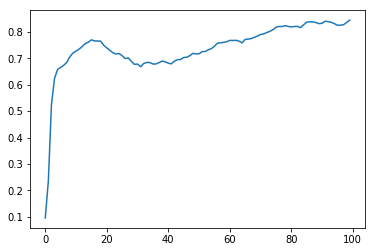

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

x = list(range(0, len(accuracy)))

new = plt.figure()
plt.plot(x, accuracy, "-", marker="None")

max_accuracy = max(accuracy)
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print("max accuracy of: " + str(acc) + ", at timestep: " + str(max_accuracy))

In [123]:
# NN model code
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
abcd = model.fit(trainingData, targetData, epochs=100, validation_split=0.2)

abcd.history["acc"]


Train on 113 samples, validate on 29 samples
Epoch 1/100
113/113 [==============================] - 2s 13ms/step - loss: 1.1139 - acc: 0.3894 - val_loss: 1.1106 - val_acc: 0.3448
Epoch 2/100
113/113 [==============================] - 0s 88us/step - loss: 1.1048 - acc: 0.3628 - val_loss: 1.1020 - val_acc: 0.3448
Epoch 3/100
113/113 [==============================] - 0s 88us/step - loss: 1.0962 - acc: 0.3628 - val_loss: 1.0947 - val_acc: 0.3448
Epoch 4/100
113/113 [==============================] - 0s 97us/step - loss: 1.0903 - acc: 0.3628 - val_loss: 1.0901 - val_acc: 0.3448
Epoch 5/100
113/113 [==============================] - 0s 88us/step - loss: 1.0863 - acc: 0.3628 - val_loss: 1.0866 - val_acc: 0.3448
Epoch 6/100
113/113 [==============================] - 0s 88us/step - loss: 1.0829 - acc: 0.3628 - val_loss: 1.0832 - val_acc: 0.3448
Epoch 7/100
113/113 [==============================] - 0s 88us/step - loss: 1.0800 - acc: 0.3628 - val_loss: 1.0803 - val_acc: 0.3448
Epoch 8/100
113/1

[0.3893805317646634,
 0.36283185919829175,
 0.3628318602532412,
 0.3628318597257665,
 0.3628318602532412,
 0.362831858670817,
 0.3628318602532412,
 0.3628318602532412,
 0.36283185906642307,
 0.3628318597257665,
 0.3628318597257665,
 0.36283185853894834,
 0.3893805328196129,
 0.39823008915491864,
 0.3982300903417368,
 0.40707964733638596,
 0.407079650237497,
 0.4159292048585098,
 0.4159292048585098,
 0.41592920723214616,
 0.38938053519324917,
 0.3982300887593126,
 0.3982300887593126,
 0.4159292048585098,
 0.4159292043310351,
 0.42477876290810845,
 0.4336283187159395,
 0.4336283222763939,
 0.44247787742488154,
 0.44247787742488154,
 0.46017699194165457,
 0.4601769924691293,
 0.4601769924691293,
 0.44247788032599256,
 0.46017699141417984,
 0.46017699128231115,
 0.46017699194165457,
 0.46017699194165457,
 0.4601769953702403,
 0.46902654893630374,
 0.4690265528923642,
 0.46017699194165457,
 0.47787610645842765,
 0.48672566450802623,
 0.47787610645842765,
 0.48672566450802623,
 0.51327433839

In [17]:
new = plt.figure()
plt.plot(x, accuracy, "-", marker="None")



max_accuracy = max(accuracy)
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print(max_accuracy, acc)

NameError: name 'plt' is not defined

In [19]:
trainingData = np.vstack((xData, yData)).T
np.shape(trainingData)

(178, 2)

In [34]:
Data = np.transpose(tData[0])

print(np.shape(Data))
print(np.shape(targetData))

(178, 13)
(178, 3)


In [60]:

# Neural net on the high dimensional space
Data = np.transpose(tData[0])

# NN model code
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(50, input_dim = 13, 
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

nnet = model.fit(Data, targetData, epochs=3)
accuracy.append(np.mean(nnet.history["acc"]))

Epoch 1/3


InvalidArgumentError: Tensor dense_3_input:0, specified in either feed_devices or fetch_devices was not found in the Graph

In [28]:
init_op = tf.global_variables_initializer()
tf.reset_default_graph()

from keras import backend as K
K.clear_session()


xData = tData[max_accuracy][0]
yData = tData[max_accuracy][1]

trainingData = np.vstack((xData, yData)).T

# NN model code
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
nnet = model.fit(trainingData, targetData, epochs=10)

xy_points = []
for i in range(100):
    for j in range(100):
        x = (2 * i - 100) / 100
        y = (2 * j - 100) / 100
        xy_points.append([x, y])
        
#score = model.evaluate(X_test, Y_test, verbose=0)

model.predict_classes(xy_points[0])


Epoch 1/10
178/178 [==============================] - 0s 530us/step - loss: 0.1689 - acc: 0.9494
Epoch 2/10
178/178 [==============================] - 0s 39us/step - loss: 0.1686 - acc: 0.9494
Epoch 3/10
178/178 [==============================] - 0s 37us/step - loss: 0.1689 - acc: 0.9494
Epoch 4/10
178/178 [==============================] - 0s 31us/step - loss: 0.1688 - acc: 0.9494
Epoch 5/10
178/178 [==============================] - 0s 43us/step - loss: 0.1688 - acc: 0.9438
Epoch 6/10
178/178 [==============================] - 0s 33us/step - loss: 0.1680 - acc: 0.9438
Epoch 7/10
178/178 [==============================] - 0s 56us/step - loss: 0.1680 - acc: 0.9494
Epoch 8/10
178/178 [==============================] - 0s 36us/step - loss: 0.1679 - acc: 0.9494
Epoch 9/10
178/178 [==============================] - 0s 44us/step - loss: 0.1676 - acc: 0.9494
Epoch 10/10
178/178 [==============================] - 0s 33us/step - loss: 0.1675 - acc: 0.9494


NotFoundError: PruneForTargets: Some target nodes not found: group_deps 

In [5]:
model.predict_classes(xy_points[0])


NameError: name 'xy_points' is not defined

In [11]:
type(tData[0])

numpy.ndarray

In [16]:

tf.reset_default_graph()


trainingData = tData[0].T

# NN model code
model = 0
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
nnet = model.fit(trainingData, targetData, epochs=5)
accuracy.append(np.mean(nnet.history["acc"]))


Epoch 1/5


InvalidArgumentError: Tensor dense_input:0, specified in either feed_devices or fetch_devices was not found in the Graph

In [55]:
tf.reset_default_graph()

xy_points = []
for i in range(100):
    for j in range(100):
        x = (2 * i - 100) / 100
        y = (2 * j - 100) / 100
        xy_points.append([x, y])
        
print(len(xy_points))
xy_points = np.asarray(xy_points)
predictions = []

with tf.Session() as sess:
    xData = tData[484][0]
    yData = tData[484][1]
    trainingData = np.vstack((xData, yData)).T
    
    print(trainingData.shape)
    
    # NN model code
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    nnet = model.fit(trainingData, targetData, epochs=100)
    print(np.mean(nnet.history["acc"]))
    
    test = np.zeros((1,2))
    print(test.shape)

    predictions = model.predict(xy_points)
    







10000
(178, 2)
Epoch 1/100
178/178 [==============================] - 0s 829us/step - loss: 1.0357 - acc: 0.5506
Epoch 2/100
178/178 [==============================] - 0s 31us/step - loss: 1.0210 - acc: 0.5618
Epoch 3/100
178/178 [==============================] - 0s 42us/step - loss: 1.0052 - acc: 0.5730
Epoch 4/100
178/178 [==============================] - 0s 34us/step - loss: 0.9896 - acc: 0.6124
Epoch 5/100
178/178 [==============================] - 0s 42us/step - loss: 0.9731 - acc: 0.6685
Epoch 6/100
178/178 [==============================] - 0s 42us/step - loss: 0.9585 - acc: 0.7135
Epoch 7/100
178/178 [==============================] - 0s 40us/step - loss: 0.9434 - acc: 0.7360
Epoch 8/100
178/178 [==============================] - 0s 48us/step - loss: 0.9284 - acc: 0.7528
Epoch 9/100
178/178 [==============================] - 0s 45us/step - loss: 0.9129 - acc: 0.7584
Epoch 10/100
178/178 [==============================] - 0s 42us/step - loss: 0.8977 - acc: 0.7640
Epoch 11/100


178/178 [==============================] - 0s 34us/step - loss: 0.2301 - acc: 0.9270
Epoch 85/100
178/178 [==============================] - 0s 41us/step - loss: 0.2290 - acc: 0.9270
Epoch 86/100
178/178 [==============================] - 0s 35us/step - loss: 0.2282 - acc: 0.9270
Epoch 87/100
178/178 [==============================] - 0s 46us/step - loss: 0.2268 - acc: 0.9213
Epoch 88/100
178/178 [==============================] - 0s 41us/step - loss: 0.2257 - acc: 0.9326
Epoch 89/100
178/178 [==============================] - 0s 31us/step - loss: 0.2245 - acc: 0.9326
Epoch 90/100
178/178 [==============================] - 0s 43us/step - loss: 0.2235 - acc: 0.9270
Epoch 91/100
178/178 [==============================] - 0s 37us/step - loss: 0.2226 - acc: 0.9326
Epoch 92/100
178/178 [==============================] - 0s 47us/step - loss: 0.2216 - acc: 0.9270
Epoch 93/100
178/178 [==============================] - 0s 34us/step - loss: 0.2207 - acc: 0.9270
Epoch 94/100
178/178 [===========

In [56]:
xy_points.shape

(10000, 2)

In [20]:
test.shape

(1, 2)

In [53]:
predictions.shape

AttributeError: 'list' object has no attribute 'shape'

In [57]:
predictionmax = []
a = predictions.tolist()
for i in range(len(a)):
    predictionmax.append(a[i].index(max(a[i])) + 1)
    


In [58]:
predictionmax

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,


array([-0.56, -0.56])

In [46]:
predictions.shape

(178, 3)

In [59]:
data_colour = []
for i in range(len(predictionmax)):
    if predictionmax[i] == 1:
        data_colour.append("r")
    elif predictionmax[i] == 2:
        data_colour.append("b")
    elif predictionmax[i] == 3:
        data_colour.append("g")
        

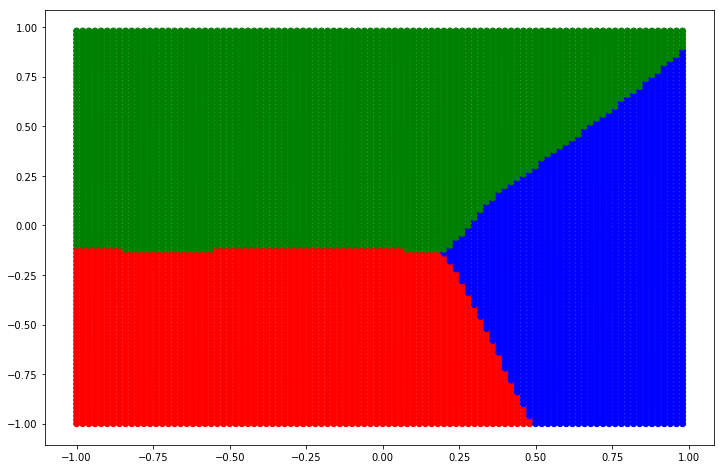

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

x, y = zip(*xy_points)

plt.figure(figsize=(12, 8))
plt.scatter(x, y, color = data_colour)
plt.show()


In [61]:
xy_points

array([[-1.  , -1.  ],
       [-1.  , -0.98],
       [-1.  , -0.96],
       ...,
       [ 0.98,  0.94],
       [ 0.98,  0.96],
       [ 0.98,  0.98]])

In [62]:
x, y = zip(*xy_points)
print(x, y)


(-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, -0.98, 

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7f3a214922e8>>
Traceback (most recent call last):
  File "/home/dom/.local/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/home/dom/.local/lib/python3.5/site-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.CancelledError: Session has been closed.
